In [ ]:
#installing while silencing the outputs

pip install transformers > NUL 2>&1

In [ ]:
#importing all the essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import re #for data pre-processing
import unicodedata #library for data pre-processing
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#mounting drive to collab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading file from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv')

In [ ]:
#Printing top 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#checking for any null values

df['sentiment'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: sentiment, Length: 50000, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Assigning X & y with review and sentiment respectively

X = df['review']
y = df['sentiment']

In [ ]:
#splitting values in to train, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7,stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.57, random_state=42)

In [ ]:
#chceking the length of the train, validation and test sets

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Training set size: 15000
Test set size: 19950
Validation set size: 15050


In [ ]:
#seeing the index locations for the variables

print(X_train.index)
print(X_test.index)
print(X_val.index)

Int64Index([12276,  4319,  4210, 20735, 49290, 39716, 45480,  6587, 17792,
            42351,
            ...
            42187, 36288, 22917,   710, 11540, 17731, 25976, 36837, 35597,
            23156],
           dtype='int64', length=15000)
Int64Index([37705, 15809, 25154, 10620,  6067, 11681, 46162, 44805,  4023,
            18822,
            ...
            14298, 49558, 37247, 48609, 42453,  4235,  2155, 26268, 42437,
            21006],
           dtype='int64', length=19950)
Int64Index([  861, 15012, 42736, 20335, 47365, 43667, 29783,  7072, 14691,
            44643,
            ...
            44013, 26105, 39106,   796, 22364, 33486,  9510, 24406, 45997,
            18961],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [ ]:
# Verifying the updated index values

print(X_train.index)
print(X_test.index)
print(X_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
#Printing the data brfore pre processing

print(X_train[0])
print(X_test[0])
print(X_val[0])

The 4th Pokemon movie made me cry when Celebi died. Don't you dare say that Pokemon sucks! I don't like it when people say that.... I've liked Pokemon for 5 or 6 years, so everyone should enjoy Pokemon, including this movie and other Pokemon movies. So, without further ado, please say that Pokemon is great and should be enjoyed by people for all ages. And also, why do Pokemon-haters give low ratings for all or most of the Pokemon movies? I don't understand.... They shouldn't do that.... There's absolutely no reason why people should just vote without proving that Pokemon sucks besides the fact that: 1) Pokemon is for little kids ONLY. 2) Pokemon is stupid. and 3) People shouldn't like Pokemon. I think this is why people don't like Pokemon.
The gimmick, as it were, of this 1934 Paramount comedy is the six comedy performers, paired off into three man-and-woman teams, who all appear together. W. C. Fields and his frequent screen partner Alsion Skipworth appear in the second half of the fi

In [ ]:
#seeing the index locations for the variables

print(y_train.index)
print(y_test.index)
print(y_val.index)

Int64Index([12276,  4319,  4210, 20735, 49290, 39716, 45480,  6587, 17792,
            42351,
            ...
            42187, 36288, 22917,   710, 11540, 17731, 25976, 36837, 35597,
            23156],
           dtype='int64', length=15000)
Int64Index([37705, 15809, 25154, 10620,  6067, 11681, 46162, 44805,  4023,
            18822,
            ...
            14298, 49558, 37247, 48609, 42453,  4235,  2155, 26268, 42437,
            21006],
           dtype='int64', length=19950)
Int64Index([  861, 15012, 42736, 20335, 47365, 43667, 29783,  7072, 14691,
            44643,
            ...
            44013, 26105, 39106,   796, 22364, 33486,  9510, 24406, 45997,
            18961],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [ ]:
print(y_train.index)
print(y_test.index)
print(y_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
print(y_train[0])
print(y_test[0])
print(y_val[0])

positive
positive
negative


In [ ]:
def preprocess_text(text):
    # Removing HTML tags
    text = re.sub('<.*?>', '', text)

    # Removing accented characters by normalizing to ASCII
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Replacing patterns like n't, nt, and n t with not
    text = re.sub(r"\b(n['’]?t|n\s?t)\b", ' not', text)

    # Removing special characters
    text = re.sub("[^a-zA-Z0-9,'!]", ' ', text)

    # Converting text to lowercase
    text = text.lower()

    # Separating text into sentences based on punctuations and then removing punctuations
    sentences = re.split(r'[.!?]', text)
    sentences = [re.sub('[,]', '', sentence) for sentence in sentences]

    # Removing extra spaces
    text = ' '.join(' '.join(sentence.split()) for sentence in sentences)

    return text

In [ ]:
# Preprocessing the data

X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test_preprocessed = [preprocess_text(text) for text in X_test]

X_val_preprocessed = [preprocess_text(text) for text in X_val]


In [ ]:
#Printing pre processed data

print(X_train_preprocessed[0])
print(X_test_preprocessed[0])
print(X_val_preprocessed[0])

the 4th pokemon movie made me cry when celebi died don't you dare say that pokemon sucks i don't like it when people say that i've liked pokemon for 5 or 6 years so everyone should enjoy pokemon including this movie and other pokemon movies so without further ado please say that pokemon is great and should be enjoyed by people for all ages and also why do pokemon haters give low ratings for all or most of the pokemon movies i don't understand they shouldn't do that there's absolutely no reason why people should just vote without proving that pokemon sucks besides the fact that 1 pokemon is for little kids only 2 pokemon is stupid and 3 people shouldn't like pokemon i think this is why people don't like pokemon
the gimmick as it were of this 1934 paramount comedy is the six comedy performers paired off into three man and woman teams who all appear together w c fields and his frequent screen partner alsion skipworth appear in the second half of the film and shine in their roles as a smal

In [ ]:
# Preprocessing the data

y_train_preprocessed = [preprocess_text(text) for text in y_train]

y_test_preprocessed = [preprocess_text(text) for text in y_test]

y_val_preprocessed = [preprocess_text(text) for text in y_val]


Tokenizing and creating datasets for train, validation and test sets so they can be used through out different types of training sessions and evaluation of diferent models

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

In [ ]:
# Tokenizing and encoding the train data
X_train_encoded = tokenizer.batch_encode_plus(
    X_train_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
# Tokenizing and encoding the validation data
X_val_encoded = tokenizer.batch_encode_plus(
    X_val_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
label_map = {"positive": 1, "negative": 0}

# Extracting input tensors from the encoded data
input_ids_train = X_train_encoded['input_ids']
attention_masks_train = X_train_encoded['attention_mask']
labels_train = torch.tensor([label_map[label] for label in y_train_preprocessed])

input_ids_val = X_val_encoded['input_ids']
attention_masks_val = X_val_encoded['attention_mask']
labels_val = torch.tensor([label_map[label] for label in y_val_preprocessed])

# Creating datasets
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
# Tokenizing and encoding the test data
X_test_encoded = tokenizer.batch_encode_plus(
    X_test_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
# Extracting input tensors and attention masks from the encoded data
label_map = {"positive": 1, "negative": 0}

input_ids_test = X_test_encoded['input_ids']
attention_masks_test = X_test_encoded['attention_mask']
labels_test = torch.tensor([label_map[label] for label in y_test_preprocessed])

# Creating datasets
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:
# Setting the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 4
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 4
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=2e-6)


# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Getting model's predictions.
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BLA.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.27781470246234286, Validation Accuracy: 0.9168106312292359
Epoch 2/5, Loss: 0.16575227175489998, Validation Accuracy: 0.921063122923588
Epoch 3/5, Loss: 0.08169201813216011, Validation Accuracy: 0.9168770764119601
Epoch 4/5, Loss: 0.03608001459531176, Validation Accuracy: 0.9246511627906977
Epoch 5/5, Loss: 0.016156292765688463, Validation Accuracy: 0.9277740863787376


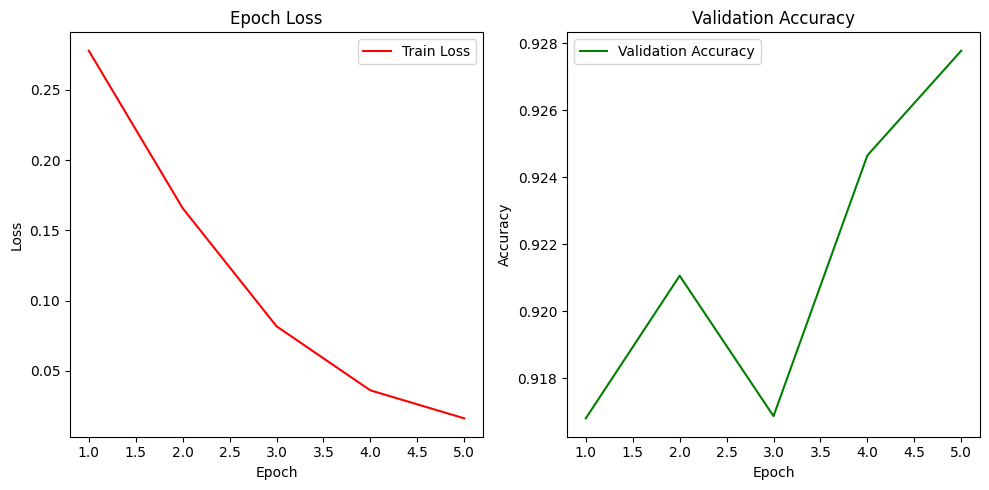

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BLA_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BLA.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 4
num_cpu = 4

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 92.96%
Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.90      0.93     10012
    positive       0.91      0.96      0.93      9938

    accuracy                           0.93     19950
   macro avg       0.93      0.93      0.93     19950
weighted avg       0.93      0.93      0.93     19950

Confusion Matrix:
 [[9021  991]
 [ 413 9525]]


In [ ]:
user_input = input("Enter a sentence: ")
preprocessed_input = preprocess_text(user_input)
encoded_input= tokenizer.batch_encode_plus(
    [preprocessed_input],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
input_ids = encoded_input['input_ids'].to(device)
attention_masks_test = encoded_input['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks_test)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

class_names = ["negative", "positive"]
predicted_sentiment = class_names[predicted_label]
print("Predicted sentiment:", predicted_sentiment)

Enter a sentence: what a puty no good
Predicted sentiment: negative
